In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm




Combining the data

In [20]:
csv = [pd.read_csv(f"./data/N_{str(i).zfill(2)}_extent_v3.0.csv") for i in range(1, 13)]
ice = pd.concat(csv, axis=0, ignore_index=True)
columns = ice.columns
name = [col.strip() for col in columns]
ice.columns = name
ice['extent'] = np.where(abs(ice['extent']) > 20 , np.nan, ice['extent'])
ice['area'] = np.where(abs(ice['area']) > 20, np.nan, ice['area'])
ice.interpolate(inplace=True)


C:\Users\LLR User\AppData\Local\Temp\ipykernel_3512\2476342085.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ice.interpolate(inplace=True)


In [21]:
ice.describe()

,year,mo,extent,area
count,541.000000,541.000000,541.000000,541.000000
mean,2000.874307,6.508318,11.354464,9.255832
std,13.027425,3.457470,3.270138,3.255909
min,1978.000000,1.000000,3.570000,2.410000
25%,1990.000000,4.000000,8.540000,6.190000
50%,2001.000000,7.000000,12.040000,9.950000
75%,2012.000000,10.000000,14.290000,12.290000
max,2023.000000,12.000000,16.340000,13.900000


Yearly Data

In [22]:

yearly_mean = ice.groupby('year')[['extent']].mean().reset_index()

In [23]:
from sklearn.model_selection import train_test_split
x = yearly_mean[['year']]
y=yearly_mean[['extent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle = False)

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

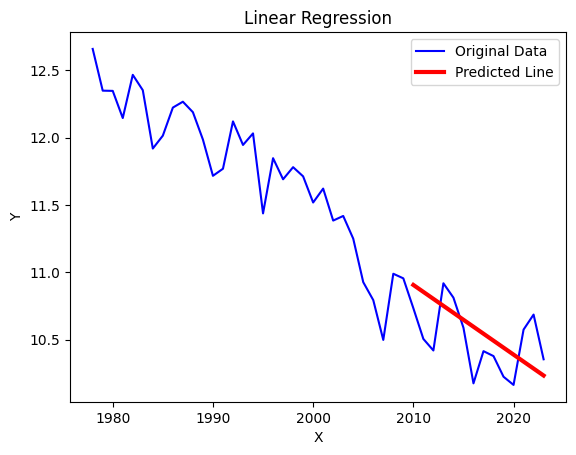

Mean Squared Error: 0.06277197923135061
Mean Absolute Error: 0.2220853461894295
R2 Score: -0.2212773533097212


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x = yearly_mean[['year']]
y=yearly_mean[['extent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle = False)

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)


model = LinearRegression()

model.fit(x_train,y_train)


plt.plot(x, y, color='blue', label='Original Data')




# Plot the line using the model parameters
y_pred = model.predict(x_test)
plt.plot(x_test, y_pred, color='red', linewidth=3, label='Predicted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')



c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


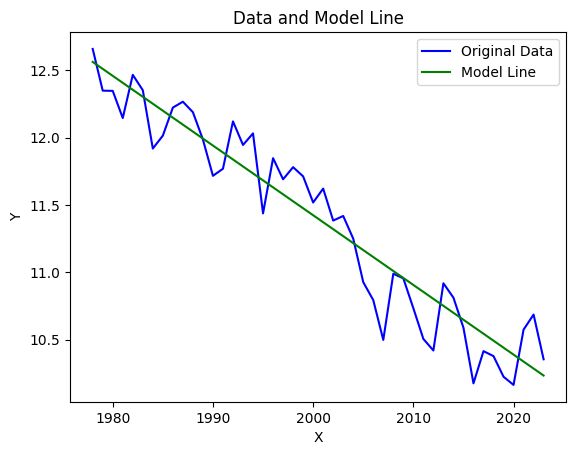

In [29]:
plt.plot(x, y, color='blue', label='Original Data')

plt.plot(x, model.predict(x), color='green', label='Model Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Model Line')
plt.legend()
plt.show()


In [33]:
sample_x = 1978
while model.predict([[sample_x]]) > 0:
    sample_x += 1

# Highlight the point where y <= 0
sample_y = model.predict([[sample_x]])

print(f'The ice extent becomes zero at year {sample_x} when used yearly data')


The ice extent becomes zero at year 2221 when used yearly data


Fitting with entire data

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'kernel': ['poly', 'rbf'],
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create the SVR model
model = SVR()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the KNN regressor
knn = KNeighborsRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best estimator
best_model = grid_search.best_estimator_





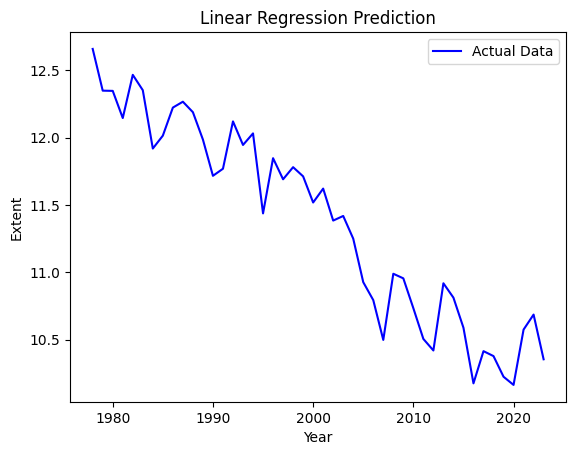

In [9]:
best_model.fit(x, y)

# Make predictions
y_pred = best_model.predict(x)

# Plot the original data and the predicted values
plt.plot(x, y, color='blue', label='Actual Data')
#plt.plot(x, y_pred, color='red', linewidth=3, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()



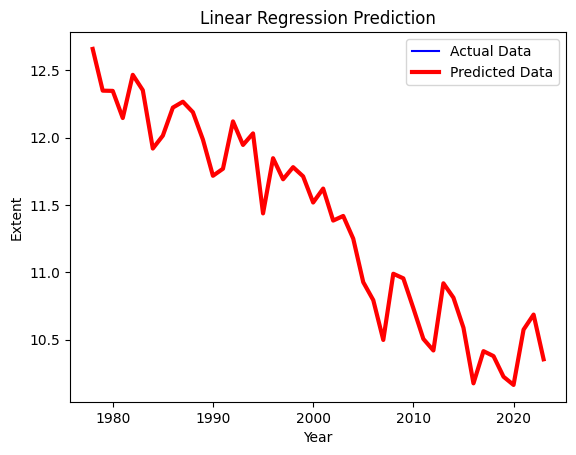

In [10]:
best_model.fit(x, y)

# Predict the values
y_pred = best_model.predict(x)

# Plot the original data and the predicted values
plt.plot(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=3, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

In [16]:
import numpy as np

start_year = 2024
end_year = start_year + 20

new_years = np.arange(start_year, end_year + 1, 1)


c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


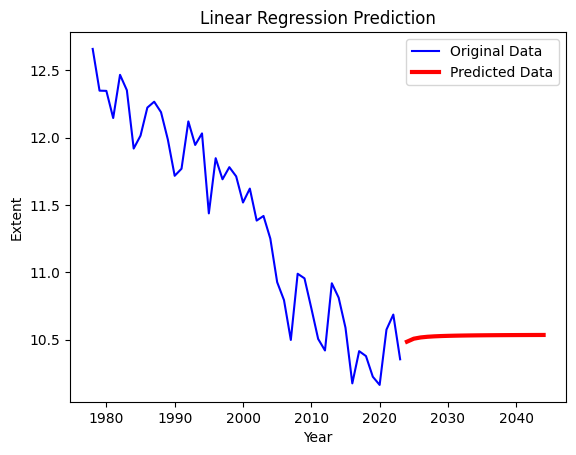

In [17]:
# Assuming 'best_model' is the best model obtained from the previous cells
pred = best_model.predict(new_years.reshape(-1, 1))

# Plot the original data and the predicted values
plt.plot(x, y, color='blue', label='Original Data')
plt.plot(new_years, pred, color='red', linewidth=3, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()


Monthly data

In [34]:
monthly_data = ice.groupby(['year', 'mo'])['extent'].mean().reset_index()
monthly_data['date'] = pd.to_datetime(monthly_data.assign(day=1, month=monthly_data['mo'])[['year', 'month', 'day']])
monthly_data.drop(['year', 'mo'], axis=1, inplace=True)
monthly_data.head()

,extent,date
0,11.65,1978-11-01
1,13.67,1978-12-01
2,15.41,1979-01-01
3,16.18,1979-02-01
4,16.34,1979-03-01


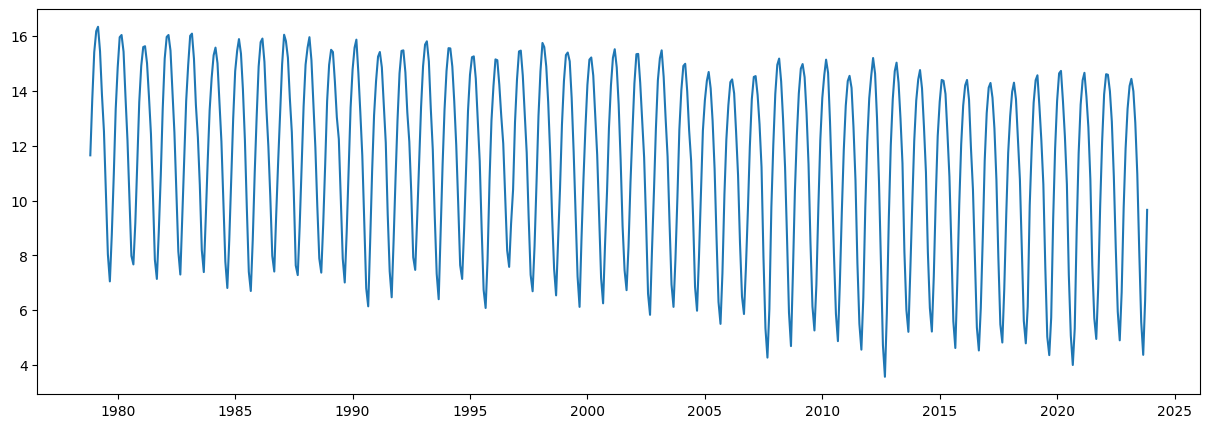

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_data['date'], monthly_data['extent'])


We could see the seasonal pattern and also,overall there is a declining trend with volatility clusters here and there.Therefore, we see the time series has varying mean and variance. Meaning, it is not stationary 

In [36]:
temp_data = monthly_data.set_index('date')

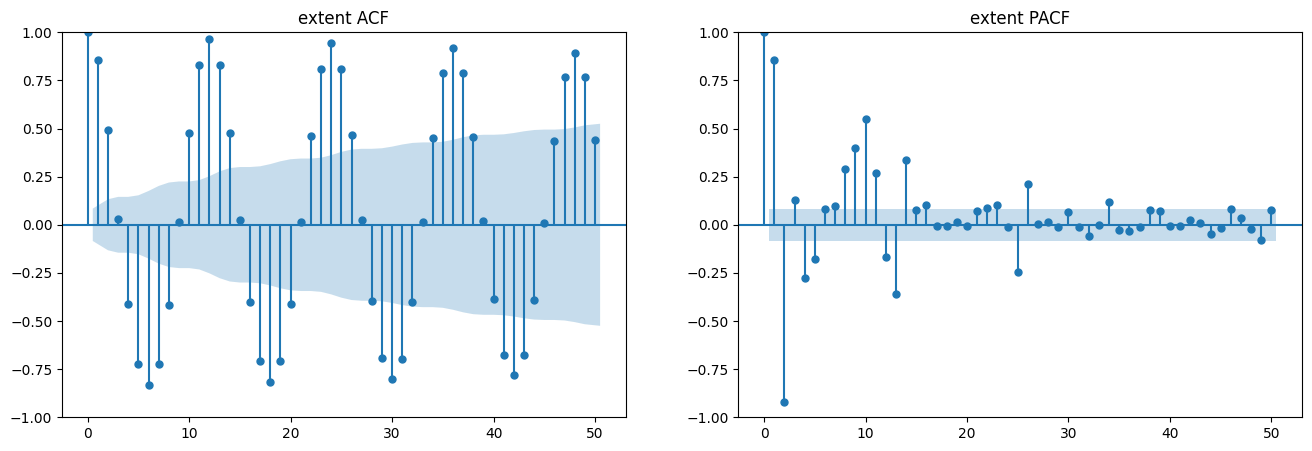

In [37]:


# plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(temp_data, title="extent ACF", lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(temp_data, title="extent PACF", lags=50, ax=ax2)
plt.show()


Since the series is seasonal and non-stationary, we will use differencing to make it stationary before applying SARIMA model

We will first do a seasonal differencing! Since, there is a recurrent pattern after every 12 lags, we take a differencing of 12.

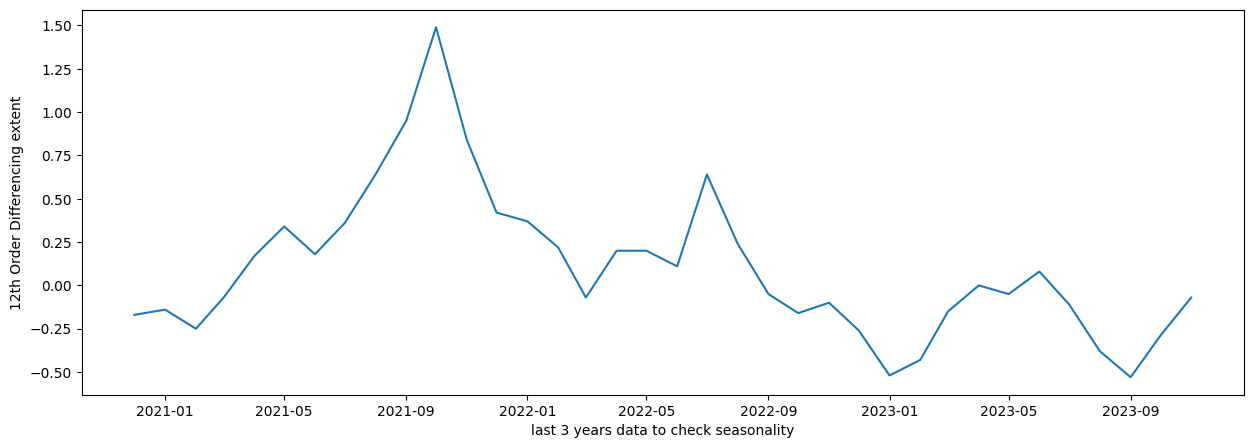

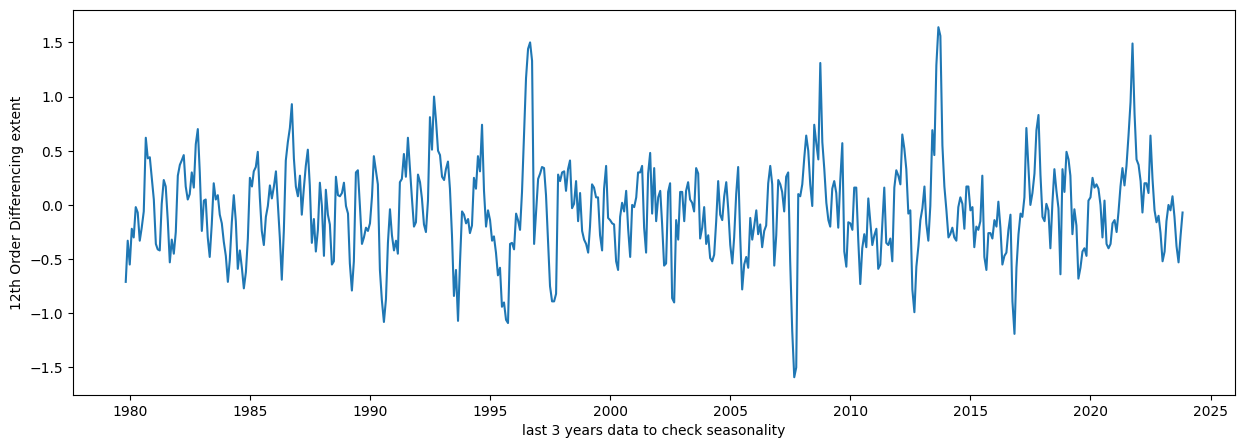

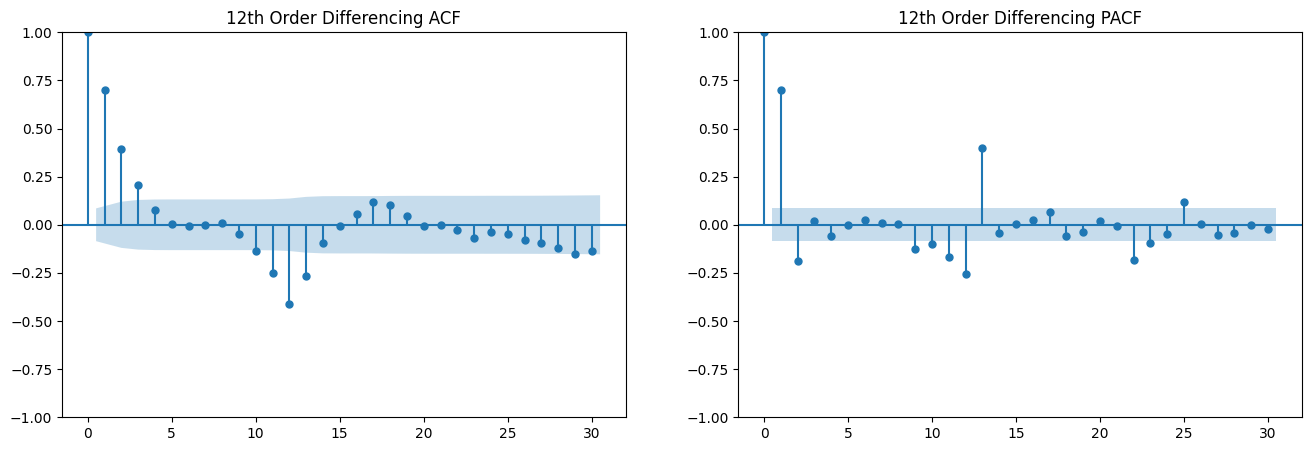

In [38]:
differenced_data = temp_data.diff(12).dropna()

plt.figure(figsize=(15, 5))
plt.plot(differenced_data[-36:])
plt.xlabel("last 3 years data to check seasonality")
plt.ylabel("12th Order Differencing extent")

plt.figure(figsize=(15, 5))
plt.plot(differenced_data)
plt.xlabel("last 3 years data to check seasonality")
plt.ylabel("12th Order Differencing extent")

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(differenced_data, title="12th Order Differencing ACF", lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(differenced_data, title="12th Order Differencing PACF", lags=30, ax=ax2)
plt.show()

We can clearly see from the above plots that we removed the effect of seasoning. But, still the series doesn't look stationary. This is because of the fact that there was a clear trend of our original data. We will do another differencing and make it stationary. 

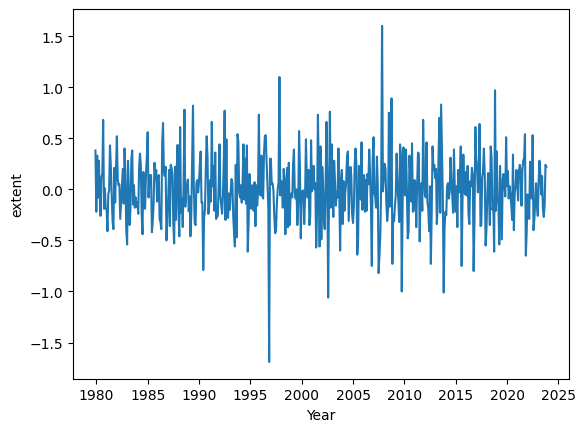

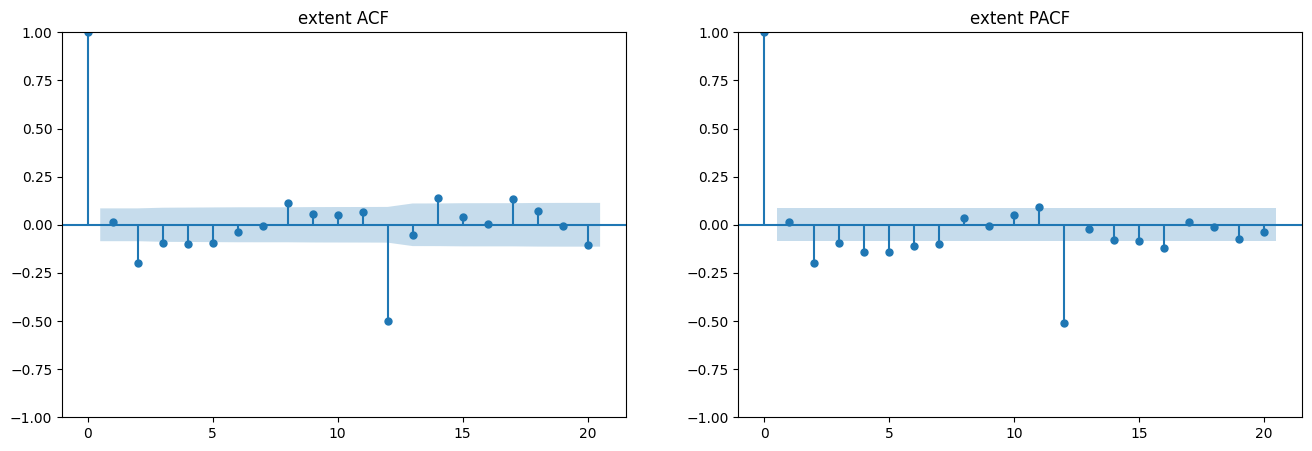

In [39]:
stationary_series = differenced_data.diff().dropna()
plt.plot(stationary_series)
plt.xlabel("Year")
plt.ylabel("extent")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(stationary_series, title="extent ACF", lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(stationary_series, title="extent PACF", lags=20, ax=ax2)
plt.show()

We will perform a logged transformed to get better acf and pacf

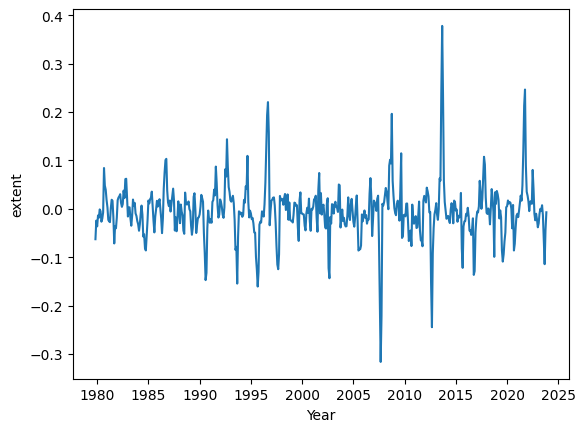

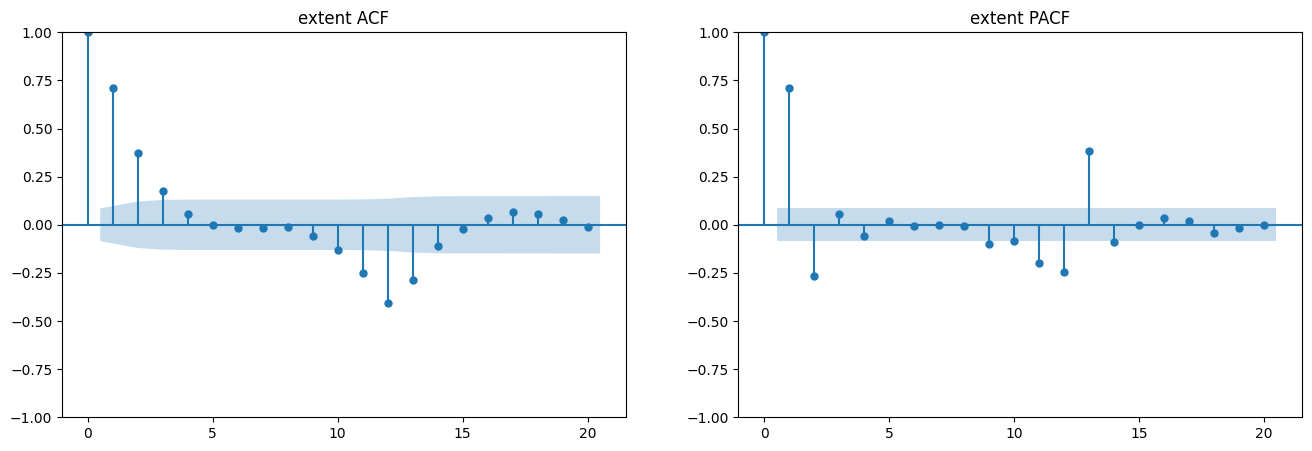

In [40]:
log_seasonal_series = np.log(temp_data).diff(12).dropna()
plt.plot(log_seasonal_series)
plt.xlabel("Year")
plt.ylabel("extent")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(log_seasonal_series, title="extent ACF", lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(log_seasonal_series, title="extent PACF", lags=20, ax=ax2)
plt.show()

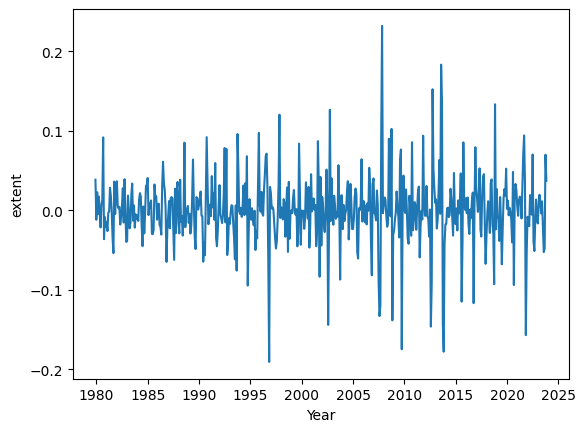

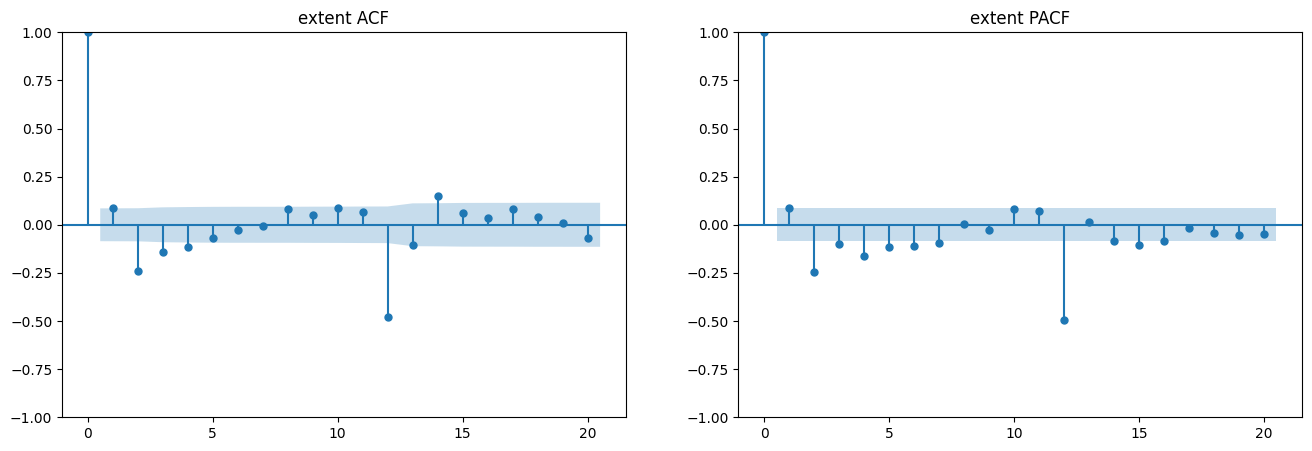

In [41]:
log_stationary_series = log_seasonal_series.diff().dropna()
plt.plot(log_stationary_series)
plt.xlabel("Year")
plt.ylabel("extent")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(log_stationary_series, title="extent ACF", lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(log_stationary_series, title="extent PACF", lags=20, ax=ax2)
plt.show()

From ACF, we can see that there is seasonality at lag 12, indicating that seasons occure after 12 points. 




In [42]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
from pmdarima.arima.utils import nsdiffs

diff_trend = ndiffs(temp_data)
diff_season = nsdiffs(temp_data,m=12)

print(diff_trend)
print(diff_season)

1
1


In [49]:
from sklearn.model_selection import train_test_split

x = temp_data.index.to_numpy()
y = temp_data['extent']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=False)


c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


R-squared: 0.9892147855080403
Mean Squared Error: 0.12629542597063342
Root Mean Squared Error: 0.35538067754259434
Mean Absolute Error: 0.28332762600329175
The ice extent becomes zero at year 2107-09-01 00:00:00


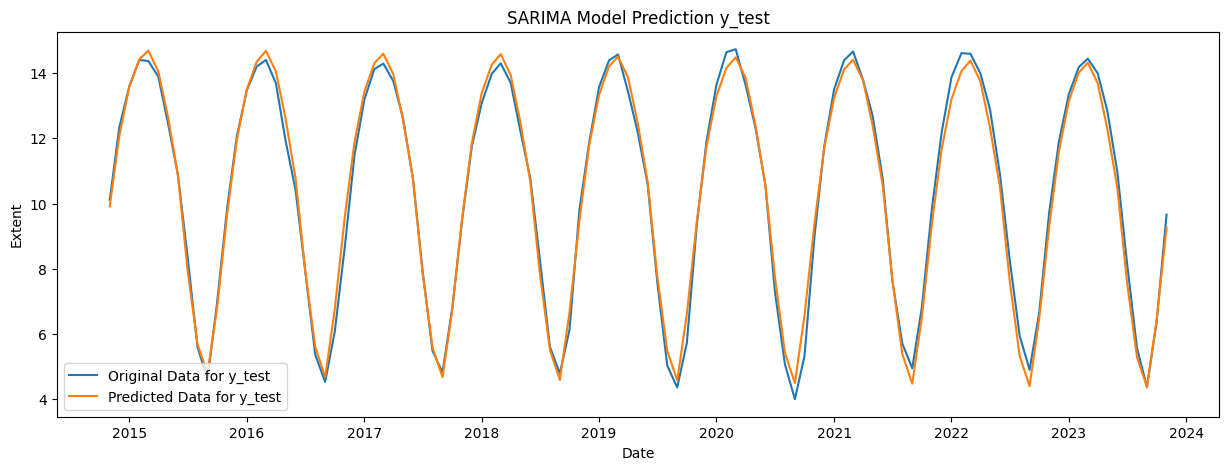

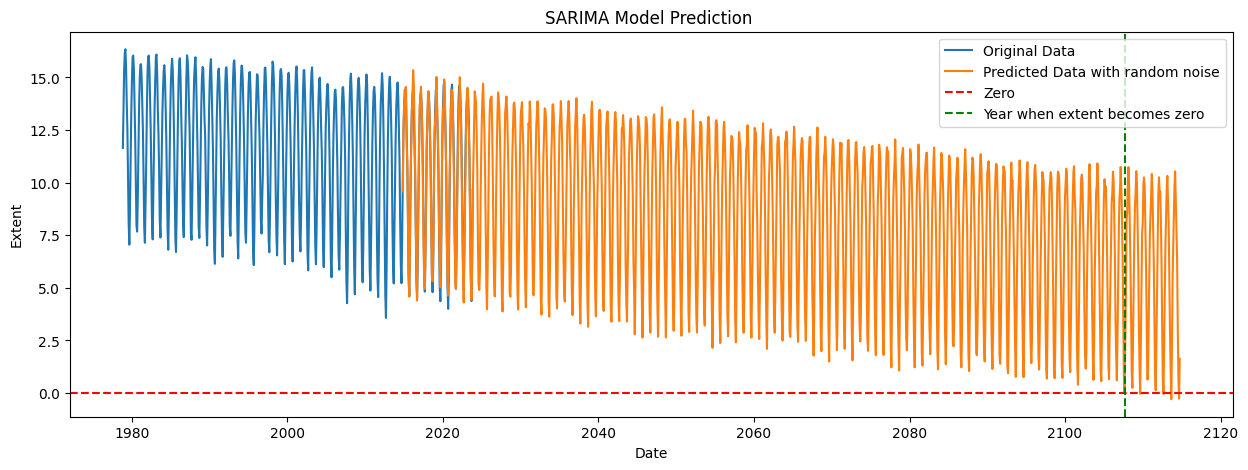

In [66]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np



# Fit the SARIMA model
model = sm.tsa.SARIMAX(y_train, order=(3, 1, 3), seasonal_order=(2, 1, 2, 12))
model_fit = model.fit()

# Predict for the next 20 time steps
forecast = model_fit.get_forecast(steps=len(y_test))
predicted_values = forecast.predicted_mean

plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test.values, label='Original Data for y_test')
#plt.plot(predicted_values.index, predicted_values, label='Predicted Data')
plt.plot(y_test.index, predicted_values, label='Predicted Data for y_test')
plt.xlabel('Date')
plt.ylabel('Extent')
plt.title('SARIMA Model Prediction y_test')
plt.legend()



from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, forecast.predicted_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, forecast.predicted_mean)
r2 = r2_score(y_test, forecast.predicted_mean)


print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")






forecast = model_fit.get_forecast(steps=1200)

# Get the predicted values
predicted_values = forecast.predicted_mean



# Add random noise
np.random.seed(123)  # for reproducibility
noise = np.random.normal(0, 0.3, len(predicted_values))
predicted_values_random= predicted_values + noise

year_x = predicted_values_random[predicted_values_random <= 0].index[0]
print(f'The ice extent becomes zero at year {year_x}')

# Plot the original data, predicted data, and predicted data with noise
plt.figure(figsize=(15, 5))
plt.plot(temp_data.index, temp_data.values, label='Original Data')
#plt.plot(predicted_values.index, predicted_values, label='Predicted Data')
plt.plot(predicted_values.index, predicted_values_random, label='Predicted Data with random noise')
plt.axhline(0, color='r', linestyle='--', label='Zero')
plt.axvline(year_x, color='g', linestyle='--', label='Year when extent becomes zero')
plt.xlabel('Date')
plt.ylabel('Extent')
plt.title('SARIMA Model Prediction ')
plt.legend()
plt.show()


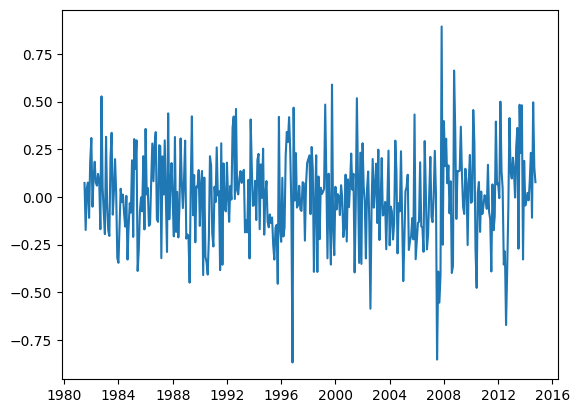

In [71]:
residuals = model_fit.resid 

residuals = residuals[-400:]
plt.plot(residuals)

In [72]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the residuals
adf_result = adfuller(residuals)

# Extract the p-value from the ADF test result
p_value = adf_result[1]

# Check if the residuals are stationary based on the p-value
if p_value < 0.05:
    print("The residuals are stationary.")
else:
    print("The residuals are not stationary.")


The residuals are stationary.


scratch arima

C:\Users\LLR User\AppData\Local\Temp\ipykernel_14832\2285567391.py:49: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ice.interpolate(inplace=True)


<Axes: xlabel='date'>

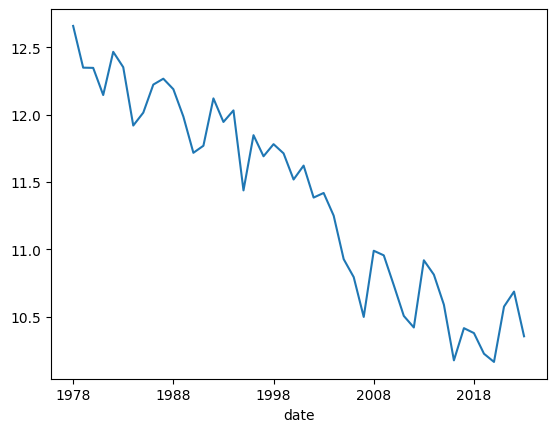

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class LinearRegression():
    def __init__(self, lr = 0.01, n_iters = 1000):
        print('Iwight')
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        self.X = X
        self.Y = y
        num_samples, num_features = X.shape     
        self.weights = np.random.rand(num_features)  
        self.bias = 0
        
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
            
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None  # default='warn'

# Reading and preprocessing data
csv = [pd.read_csv(f"./data/N_{str(i).zfill(2)}_extent_v3.0.csv") for i in range(1, 13)]
ice = pd.concat(csv, axis=0, ignore_index=True)
columns = ice.columns
name = [col.strip() for col in columns]
ice.columns = name
ice['extent'] = np.where(abs(ice['extent']) > 20, np.nan, ice['extent'])
ice['area'] = np.where(abs(ice['area']) > 20, np.nan, ice['area'])
ice.interpolate(inplace=True)



# Monthly data
monthly_data = ice.groupby(['year', 'mo'])['extent'].mean().reset_index()
monthly_data.rename(columns={'mo': 'month'}, inplace=True)
monthly_data['date'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))
monthly_data.set_index('date', inplace=True)
monthly_data.index = monthly_data.index.strftime('%Y-%m')
monthly_data.drop(['year', 'month'], axis=1, inplace=True)

#yearly data
yearly_mean = ice.groupby('year')[['extent']].mean().reset_index()
yearly_mean['date'] = pd.to_datetime(yearly_mean[['year']].assign(month=1, day=1))
yearly_mean.set_index('date', inplace=True)
yearly_mean.index = yearly_mean.index.strftime('%Y')
yearly_mean.drop(['year'], axis=1, inplace=True)


yearly_mean['extent'].plot()

In [2]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
diff_trend = ndiffs(yearly_mean)
print(diff_trend)

1


In [3]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the residuals
adf_result = adfuller(yearly_mean.diff(1).dropna())

# Extract the p-value from the ADF test result
p_value = adf_result[1]

# Check if the data are stationary based on the p-value
if p_value < 0.05:
    print("The data are stationary.")
else:
    print("The data are not stationary.")

The data are stationary.


In [4]:
stationary_year = yearly_mean.diff(1).dropna()

<Axes: xlabel='date'>

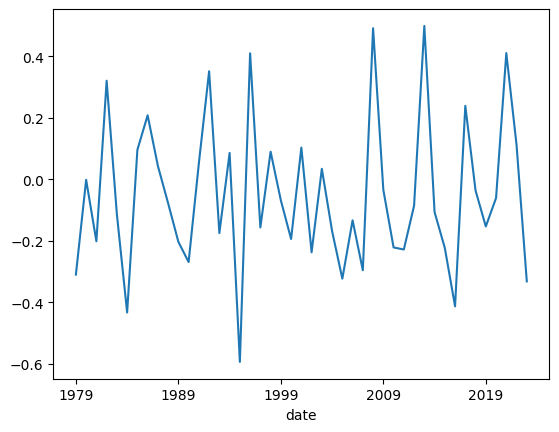

In [5]:
stationary_year['extent'].plot()

In [6]:
def AR(p, dataframe):
    
    for i in range(1,p+1):
        dataframe[f'Shifted_values_{i}'] = dataframe['extent'].shift(i)
        
    train_size = int(0.8 * dataframe.shape[0])
    
    df_train = pd.DataFrame(dataframe[0:train_size])
    df_test = pd.DataFrame(dataframe[train_size:])
 
    df_train_2 = df_train.dropna()
    X_train = df_train_2.iloc[:, 1:].values.reshape(-1, p)
    y_train = df_train_2.iloc[:,0].values.reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    theta = lr.weights
    intercept = lr.bias
 
    plt.figure(figsize=(10, 6))
    df_train_2['Predicted_Values'] = X_train.dot(lr.weights) + lr.bias
    
    df_train_2[['extent', 'Predicted_Values']].plot()
    
    X_test = df_test.iloc[:, 1:].values.reshape(-1, p)
    df_test['Predicted_Values'] = X_test.dot(lr.weights) + lr.bias
    df_test[['extent', 'Predicted_Values']].plot()
    
    RMSE = np.sqrt(mean_squared_error(df_test['extent'], df_test['Predicted_Values']))

    print("The RMSE is:", RMSE, ", Value of p:", p)
    return [df_train_2, df_test, theta, intercept, RMSE]

    
    

In [7]:
[df_train,df_test,theta,intercept,RMSE] = AR(3,stationary_year)

AttributeError: 'LinearRegression' object has no attribute 'weights'

In [8]:
df_c = pd.concat([df_train,df_test])
df_c[['extent','Predicted_Values']].plot()
res = pd.DataFrame()
res['Residuals'] = df_c.extent - df_c.Predicted_Values


NameError: name 'df_train' is not defined

In [10]:
def MA(q,res):
    for i in range(1,q+1):
        res[f'Shifted_values_{i}'] = res['Residuals'].shift(i)
        
    train_size = (int)(0.8 * res.shape[0])    

    res_train = pd.DataFrame(res[0:train_size])
    res_test = pd.DataFrame(res[train_size:])
    
    res_train_2 = res_train.dropna()
    X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
    y_train = res_train_2.iloc[:,0].values.reshape(-1,1)  
    
    
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    theta  = lr.weights
    intercept = lr.bias
    res_train_2['Predicted_Values'] = X_train.dot(lr.weights) + lr.bias
    # res_train_2[['Residuals','Predicted_Values']].plot()

    X_test = res_test.iloc[:,1:].values.reshape(-1,q)
    res_test['Predicted_Values'] = X_test.dot(lr.weights) + lr.bias
    res_test[['Residuals','Predicted_Values']].plot()


    RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

    print("The RMSE is :", RMSE,", Value of q : ",q)
    return [res_train_2,res_test,theta,intercept,RMSE] 

In [ ]:
best_RMSE=100000000000
best_q = -1

for i in range(1,13):
  [res_train,res_test,theta,intercept,RMSE] = MA(i,pd.DataFrame(res.Residuals))
  if(RMSE<best_RMSE):
    best_RMSE = RMSE
    best_q = i
  
print(best_q)

In [11]:
[res_train,res_test,theta,intercept,RMSE] = MA(3,res)


NameError: name 'res' is not defined

In [12]:
res_c = pd.concat([res_train,res_test])
res_c.head()

NameError: name 'res_train' is not defined

In [13]:
df_c['Predicted_Values'] += res_c['Predicted_Values']


NameError: name 'df_c' is not defined

In [ ]:
df_c[['extent','Predicted_Values']].plot()

In [14]:
original_series = df_c['Predicted_Values'] + yearly_mean['extent'].shift(1)
original_series = original_series.dropna()
original_series_df = pd.DataFrame(original_series, columns=['extent'])

NameError: name 'df_c' is not defined

NameError: name 'original_series' is not defined

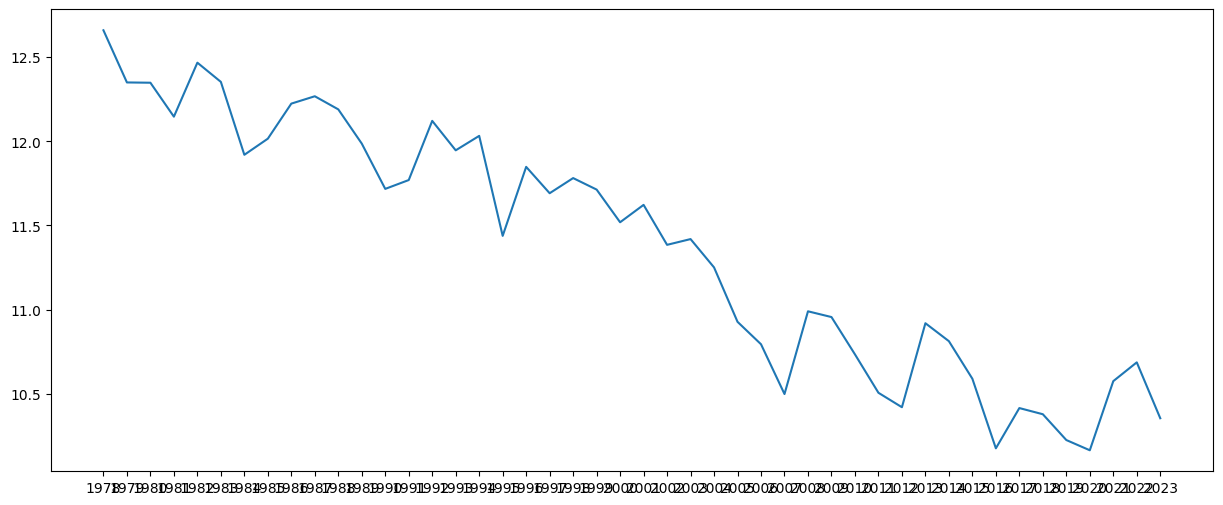

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(yearly_mean)
plt.plot(original_series)
plt.legend()

Multiple linear regression 


In [75]:
temp = pd.read_csv('./data/land_ocean_temperature.csv')
carbon = pd.read_csv('./data/monthly_co2.csv')

In [76]:
temp.rename(columns={'Lowness (5)': 'low'}, inplace=True)

In [77]:
carbon['date'] = pd.to_datetime(carbon.assign(day=1, month=carbon['month'])[['year', 'month', 'day']])
carbon.set_index('date', inplace=True)
carbon = carbon[['monthly_average']]
monthly_data.set_index('date', inplace=True)
monthly_data.head()


,extent
date,
1978-11-01,11.65
1978-12-01,13.67
1979-01-01,15.41
1979-02-01,16.18
1979-03-01,16.34


In [78]:
data = pd.concat([monthly_data, carbon], axis=1, join='inner')
data = pd.DataFrame(data)
data.head()

,extent,monthly_average
date,,
1978-11-01,11.65,333.76
1978-12-01,13.67,334.91
1979-01-01,15.41,336.14
1979-02-01,16.18,336.69
1979-03-01,16.34,338.27


In [79]:
data.shape

(541, 2)

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression


a,b = 1,2

temp = 25


'''
Add any other variables which you think might be useful and find the coefficients
'''
y = a*data['monthly_average'] + b*data['temperature'] + np.random.normal(scale=0.1, size=data.shape[0])

df = pd.DataFrame(data)

model = LinearRegression()
X = df[['monthly_average', 'temperature']]
y = df['extent']
model.fit(X, y)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


KeyError: 'temperature'